In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image, y_train_label), \
(x_test_image, y_test_label) = mnist.load_data()

In [4]:
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')
#以reshape將原本28X28影像，轉換成784個float數字

In [7]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [8]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)
# similar to as.factor in R

In [9]:
# 匯入所需模組
from keras.models import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()
#建立一個堆疊模型，後續只需使用 model.add() 即可將各層加入網路

In [11]:
model.add(Dense(units = 256, #隱藏層神經元個數：256
               input_dim = 784, #輸入曾神經元個數：784
               kernel_initializer = 'normal', #以常態分佈初始weight與bias
               activation = 'relu'#使用ReLU作為激活函數
               ))

In [12]:
model.add(Dense(units = 10, #輸出層個數：10
                kernel_initializer = 'normal', 
                activation = 'softmax'
               ))

In [13]:
print(model.summary())
# output = activation(Wx+b)
# Param = 上一層神經元數*本層神經元數 + 本層神經元數
# 200960 = 784*256 + 256
# 2570 = 256*10 +10

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
#定義訓練方式
model.compile(loss = 'categorical_crossentropy', #交叉熵
              optimizer = 'adam', #優化方式
              metrics = ['accuracy'] )#以準確度作為評估模型方式

In [15]:
train_history = model.fit(x = x_Train_normalize, 
                          y = y_TrainOneHot, 
                          validation_split = 0.2, #20% test set
                          epochs = 10, #10次訓練週期
                          batch_size = 200, #每一批次200筆資料
                          verbose = 2) #顯示訓練過程
# epochs = 10 共執行10次練週期，每一次週期完成以下動作
# 48000筆training data分成每一批200筆, 分成240(=48000/200)批次

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
2s - loss: 0.4389 - acc: 0.8827 - val_loss: 0.2184 - val_acc: 0.9406
Epoch 2/10
2s - loss: 0.1913 - acc: 0.9456 - val_loss: 0.1561 - val_acc: 0.9557
Epoch 3/10
1s - loss: 0.1358 - acc: 0.9616 - val_loss: 0.1265 - val_acc: 0.9645
Epoch 4/10
2s - loss: 0.1031 - acc: 0.9702 - val_loss: 0.1127 - val_acc: 0.9682
Epoch 5/10
2s - loss: 0.0813 - acc: 0.9773 - val_loss: 0.0984 - val_acc: 0.9716
Epoch 6/10
1s - loss: 0.0661 - acc: 0.9818 - val_loss: 0.0946 - val_acc: 0.9718
Epoch 7/10
1s - loss: 0.0545 - acc: 0.9853 - val_loss: 0.0915 - val_acc: 0.9738
Epoch 8/10
1s - loss: 0.0460 - acc: 0.9876 - val_loss: 0.0829 - val_acc: 0.9758
Epoch 9/10
1s - loss: 0.0380 - acc: 0.9902 - val_loss: 0.0825 - val_acc: 0.9754
Epoch 10/10
2s - loss: 0.0316 - acc: 0.9918 - val_loss: 0.0807 - val_acc: 0.9763


In [16]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

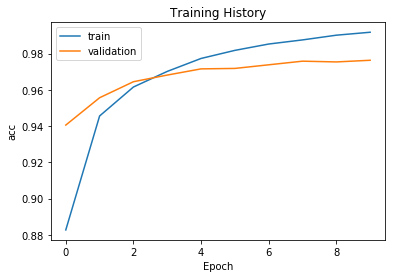

In [17]:
show_train_history(train_history, 'acc', 'val_acc')

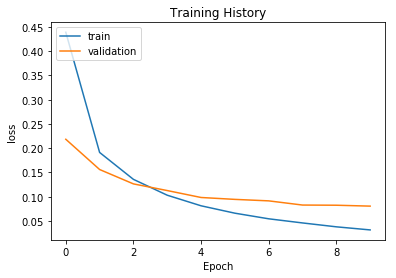

In [18]:
show_train_history(train_history, 'loss', 'val_loss')

In [19]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
# 使用model.evaluate評估模型準確率，並將結果存在scores
print()
print('accuracy =', scores[1])

 9600/10000 [===========================>..] - ETA: 0s
accuracy = 0.9754


In [20]:
prediction = model.predict_classes(x_Test)
prediction

 9216/10000 [==========================>...] - ETA: 0s

array([7, 2, 1, ..., 4, 5, 6])

In [21]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, 
                                 prediction, idx, num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num): 
        ax = plt.subplot(5, 5, 1+i) #建立subgraph子圖形為5行5列
        ax.imshow(images[idx], cmap = 'binary') #畫出subgraph子圖形
        title = "label =" + str(labels[idx]) #設定子圖形title，顯示標籤欄位
        if len(prediction) > 0: #如果有傳入預測結果
            title += ", predict =" + str(prediction[idx]) #標題title加入預測結果
        ax.set_title(title, fontsize = 10) #設定子圖形的標題title與大小
        ax.set_xticks([]); ax.set_yticks([]) #設定不顯示刻度
        idx += 1 #讀取下一筆
    plt.show()

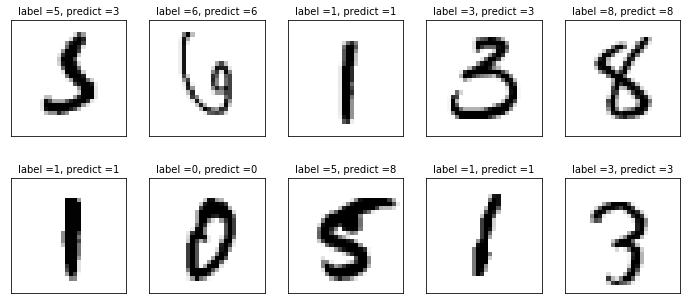

In [22]:
plot_images_labels_prediction(x_test_image, y_test_label, 
                             prediction, idx = 340)

In [23]:
# 建立列聯表
import pandas as pd
pd.crosstab(y_test_label, prediction, 
            rownames=['label'], colnames = ['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1007,3,2,0,2,4,9,0
3,0,0,5,991,0,0,0,4,6,4
4,2,0,5,1,960,0,3,0,3,8
5,3,0,0,15,1,850,7,2,11,3
6,6,3,3,1,4,3,936,0,2,0
7,0,5,12,6,1,0,0,991,5,8
8,5,0,3,6,2,1,1,2,953,1


In [24]:
df = pd.DataFrame({'label': y_test_label, 'predict': prediction})
df[:2] #前兩列(row 0 and row 1)
df[(df.label == 5) & (df.predict == 3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
4271,5,3
4355,5,3


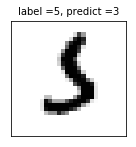

In [25]:
plot_images_labels_prediction(x_test_image, y_test_label, 
                             prediction, idx = 340, num = 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
7s - loss: 0.2930 - acc: 0.9157 - val_loss: 0.1535 - val_acc: 0.9565
Epoch 2/10
6s - loss: 0.1154 - acc: 0.9671 - val_loss: 0.1211 - val_acc: 0.9640
Epoch 3/10
6s - loss: 0.0741 - acc: 0.9793 - val_loss: 0.0919 - val_acc: 0.9733
Epoch 4/10
6s - loss: 0.0525 - acc: 0.9851 - val_loss: 0.0820 - val_acc: 0.9746
Epoch 5/10
6s - loss: 0.0364 - acc: 0.9903 - val_loss: 0.0838 - val_acc: 0.9747
Epoch 6/10
6s - loss: 0.0249 - acc: 0.9938 - val_loss: 0.0739 - val_acc: 0.97

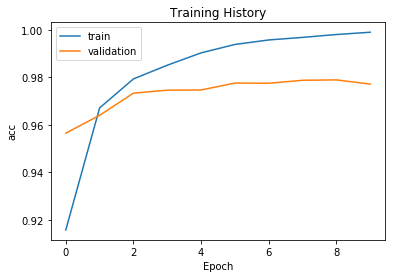

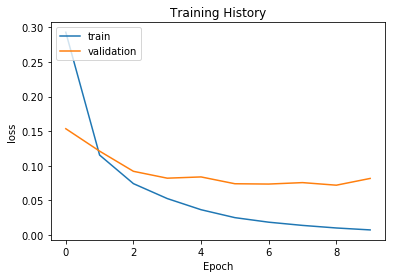

 9856/10000 [============================>.] - ETA: 0s
accuracy = 0.9802


In [26]:
model = Sequential()
model.add(Dense(units = 1000, #隱藏層神經元個數：1000
               input_dim = 784, 
               kernel_initializer = 'normal', 
               activation = 'relu'
               ))
model.add(Dense(units = 10, 
                kernel_initializer = 'normal', 
                activation = 'softmax'
               ))
print(model.summary())
model.compile(loss = 'categorical_crossentropy', \
              optimizer = 'adam', 
              metrics = ['accuracy'] )
train_history = model.fit(x = x_Train_normalize, 
                          y = y_TrainOneHot, 
                          validation_split = 0.2, 
                          epochs = 10, 
                          batch_size = 200, 
                          verbose = 2) 
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print('accuracy =', scores[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
8s - loss: 0.3527 - acc: 0.8944 - val_loss: 0.1626 - val_acc: 0.9541
Epoch 2/10
7s - loss: 0.1596 - acc: 0.9530 - val_loss: 0.1181 - val_acc: 0.9649
Epoch 3/10
7s - loss: 0.1152 - acc: 0.9661 - val_loss: 0.0969 - val_acc: 0.9703
Epoch 4/10
7s - loss: 0.0909 - acc: 0.9731 - val_loss: 0.0870 - val_acc: 0.9724
Epoch 5/10
7s - loss: 0.0

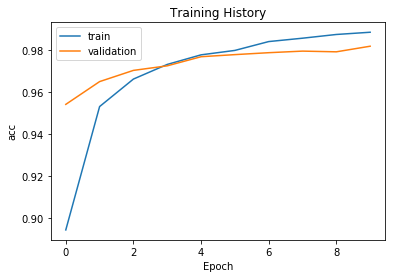

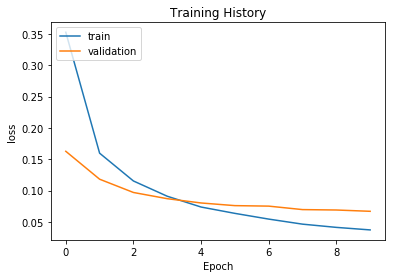

 9984/10000 [============================>.] - ETA: 0s
accuracy = 0.9821


In [27]:
# Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout #匯入Dropout模組
model = Sequential()
model.add(Dense(units = 1000, 
               input_dim = 784, 
               kernel_initializer = 'normal', 
               activation = 'relu'
               ))
model.add(Dropout(0.5)) #加入Dropout避免overfitting
model.add(Dense(units = 10, 
                kernel_initializer = 'normal', 
                activation = 'softmax'
               ))
print(model.summary())
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', 
              metrics = ['accuracy'] )
train_history = model.fit(x = x_Train_normalize, 
                          y = y_TrainOneHot, 
                          validation_split = 0.2, 
                          epochs = 10, 
                          batch_size = 200, 
                          verbose = 2)
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print('accuracy =', scores[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
17s - loss: 0.3736 - acc: 0.8834 - val_loss: 0.1328 - val_acc: 0.9

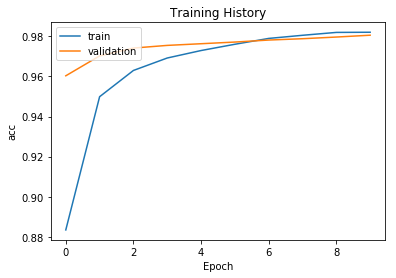

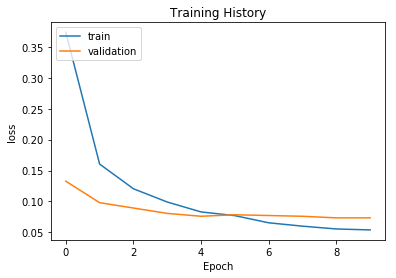

 9952/10000 [============================>.] - ETA: 0s
accuracy = 0.981


In [28]:
# 建立多個隱藏層
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout 
model = Sequential()
# 加入輸入層與第一個隱藏層
model.add(Dense(units = 1000, 
               input_dim = 784, 
               kernel_initializer = 'normal', 
               activation = 'relu'
               ))
model.add(Dropout(0.5)) 
#加入第二個隱藏層
model.add(Dense(units = 1000, 
               kernel_initializer = 'normal', 
               activation = 'relu'
               ))
model.add(Dropout(0.5)) 
model.add(Dense(units = 10, 
                kernel_initializer = 'normal', 
                activation = 'softmax'
               ))
print(model.summary())
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', 
              metrics = ['accuracy'] )
train_history = model.fit(x = x_Train_normalize, 
                          y = y_TrainOneHot, 
                          validation_split = 0.2, 
                          epochs = 10, 
                          batch_size = 200, 
                          verbose = 2)
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print('accuracy =', scores[1])


In [29]:
prediction = model.predict_classes(x_Test)
prediction
import pandas as pd
pd.crosstab(y_test_label, prediction, 
            rownames=['label'], colnames = ['predict'])

 9792/10000 [============================>.] - ETA: 0s

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,1,0,0,2,1,1,2,2,0
1,0,1128,2,1,0,1,2,0,1,0
2,4,0,1015,2,2,0,0,5,4,0
3,1,0,4,994,0,2,0,5,2,2
4,1,0,3,0,961,0,0,2,0,15
5,2,0,0,8,1,876,2,0,1,2
6,3,2,1,1,4,8,938,0,1,0
7,1,6,8,1,0,0,0,1005,2,5
8,3,0,3,9,4,7,2,5,937,4


In [30]:
np.mean(prediction == y_test_label)

0.97999999999999998

In [31]:
from keras.models import load_model


In [32]:
json_string = model.to_json
print(json_string)

<bound method Container.to_json of <keras.models.Sequential object at 0x12d1eb978>>


In [33]:
np.set_printoptions(threshold = 1)
#np.set_printoptions(threshold = np.nan)

In [34]:
model.get_weights()[4]

array([[ 0.01850593,  0.00762922, -0.02005058, ...,  0.02387847,
        -0.12675552, -0.06087386],
       [ 0.04577015,  0.02209547,  0.02621761, ...,  0.07395436,
        -0.00029651,  0.03341579],
       [-0.07560609, -0.04464569,  0.09793154, ...,  0.01406102,
         0.03605115, -0.05675925],
       ..., 
       [ 0.09392823, -0.05493357,  0.00200605, ..., -0.10214566,
         0.03125802,  0.00740753],
       [-0.00042697, -0.03691287, -0.14702226, ..., -0.04661644,
        -0.06724789,  0.03438751],
       [ 0.02309488, -0.15573284,  0.00823603, ...,  0.00409237,
         0.02908264,  0.03042303]], dtype=float32)

In [35]:
np.savetxt(fname = 'summary/NN/W1.csv', X = np.transpose(model.get_weights()[0]), 
           fmt='%f', comments = '', newline='\n', 
           header = '', delimiter = ',')
np.savetxt(fname = 'summary/NN/b1.csv', X = (model.get_weights()[1]), 
           fmt='%f', comments = '', newline='\n', 
           header = '', delimiter = ',')


np.savetxt(fname = 'summary/NN/W2.csv', X = np.transpose(model.get_weights()[2]), 
           fmt='%f', comments = '', newline='\n', 
           header = '', delimiter = ',')
np.savetxt(fname = 'summary/NN/b2.csv', X = (model.get_weights()[3]), 
           fmt='%f', comments = '', newline='\n', 
           header = '', delimiter = ',')


np.savetxt(fname = 'summary/NN/W3.csv', X = np.transpose(model.get_weights()[4]), 
           fmt='%f', comments = '', newline='\n', 
           header = '', delimiter = '\n')
np.savetxt(fname = 'summary/NN/b3.csv', X = (model.get_weights()[5]), 
           fmt='%f', comments = '', newline='\n', 
           header = '', delimiter = '\n')

In [36]:
np.transpose(model.get_weights()[4])

array([[ 0.01850593,  0.04577015, -0.07560609, ...,  0.09392823,
        -0.00042697,  0.02309488],
       [ 0.00762922,  0.02209547, -0.04464569, ..., -0.05493357,
        -0.03691287, -0.15573284],
       [-0.02005058,  0.02621761,  0.09793154, ...,  0.00200605,
        -0.14702226,  0.00823603],
       ..., 
       [ 0.02387847,  0.07395436,  0.01406102, ..., -0.10214566,
        -0.04661644,  0.00409237],
       [-0.12675552, -0.00029651,  0.03605115, ...,  0.03125802,
        -0.06724789,  0.02908264],
       [-0.06087386,  0.03341579, -0.05675925, ...,  0.00740753,
         0.03438751,  0.03042303]], dtype=float32)

In [37]:
np.set_printoptions(threshold = np.inf)
model.get_weights()[2].tolist()
#np.set_printoptions(threshold = 1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
